# Diabetes Prediction Project

In [180]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

## Phase 1: Exploratory Data Analysis (EDA)

### Load Dataset

In [181]:
diabetes = pd.read_csv("diabetes.csv")

In [182]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [183]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [184]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [185]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [186]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [187]:
print("The Number of Duplicated Rows: ",diabetes.duplicated().sum())

The Number of Duplicated Rows:  0


### Correlation Analysis

In [188]:
corr = diabetes.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [189]:
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

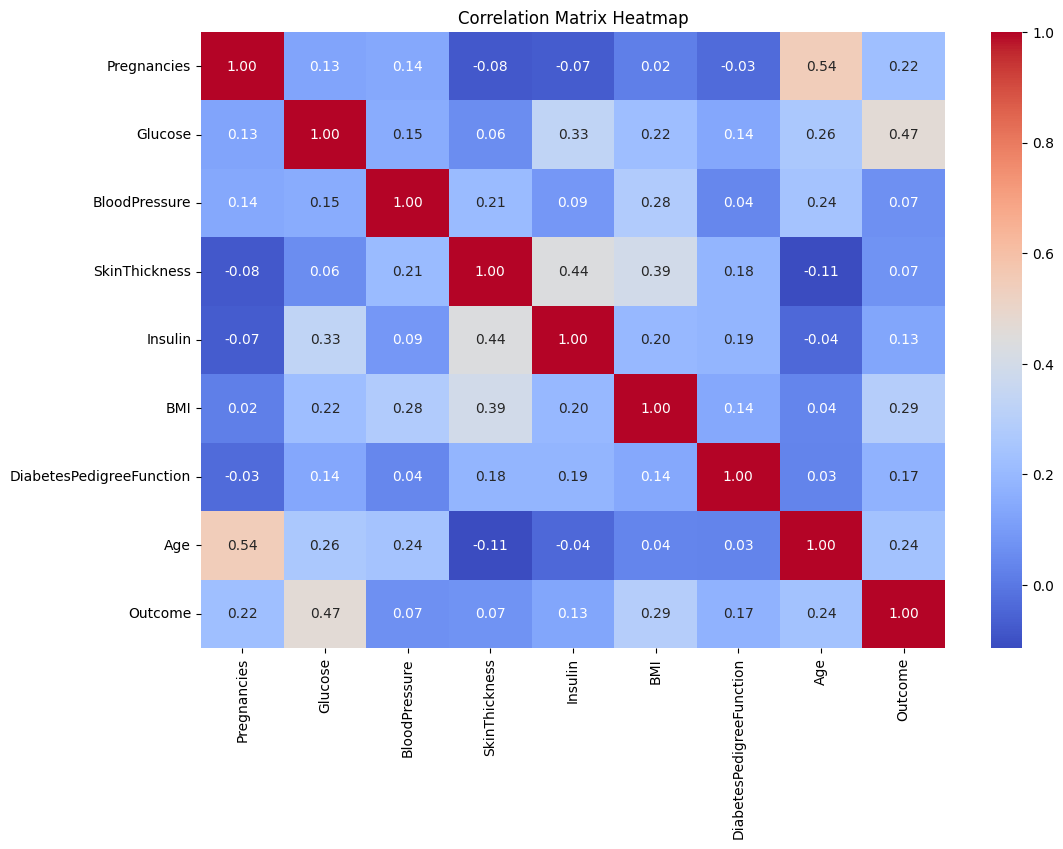

In [190]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

`Glucose`, `BMI`, and `Age` are strongly correlated with diabetes outcome.

### Data Visualization

- #### Outcome Distribution

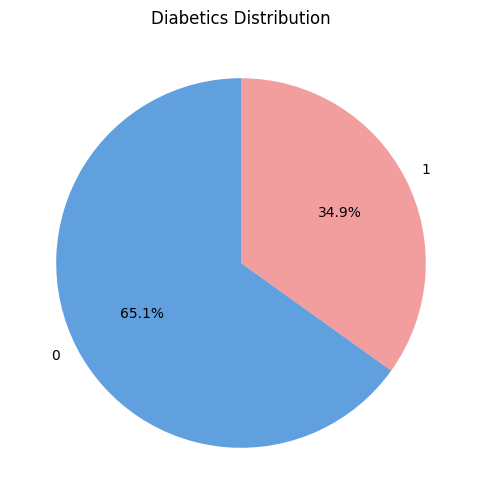

In [191]:
plt.figure(figsize=(6,6))
diabetes['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#60a0df","#ed7171ae"])
plt.title("Diabetics Distribution")
plt.ylabel("")
plt.show()

- #### Glucose by Outcome:

C:\Users\DELL\AppData\Local\Temp\ipykernel_4092\2306949109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Glucose", data=diabetes, palette="Set2")


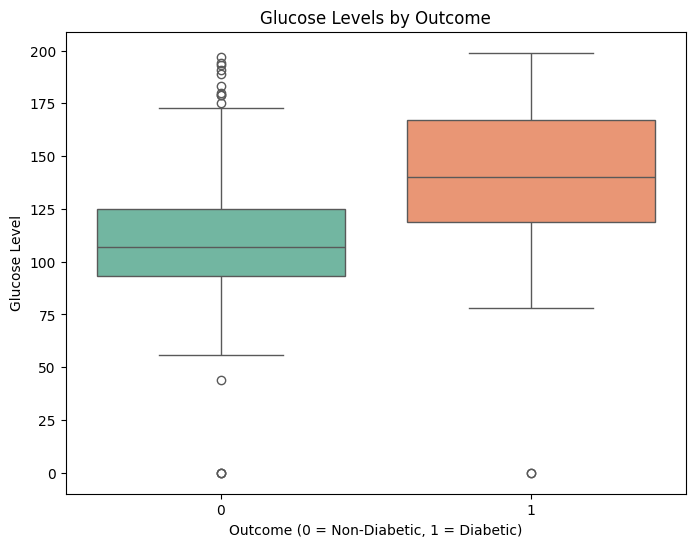

In [192]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Outcome", y="Glucose", data=diabetes, palette="Set2")
plt.title("Glucose Levels by Outcome")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Glucose Level")
plt.show()

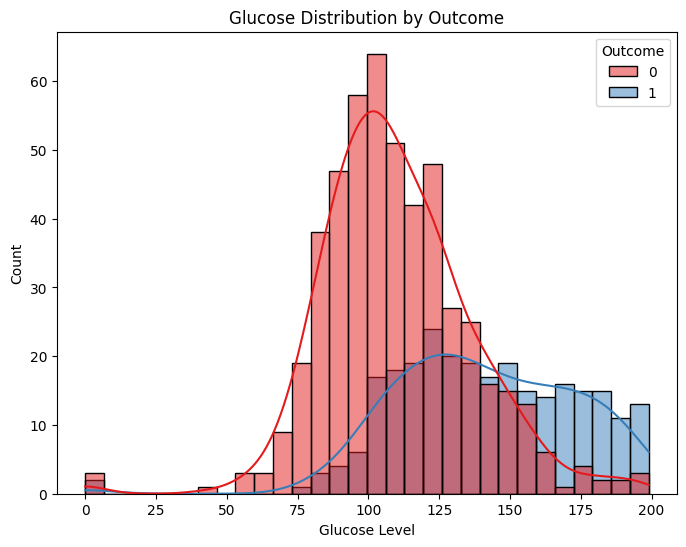

In [193]:
plt.figure(figsize=(8,6))
sns.histplot(data=diabetes, x="Glucose", hue="Outcome", kde=True, bins=30, palette="Set1")
plt.title("Glucose Distribution by Outcome")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()

- #### BMI by Outcome:

C:\Users\DELL\AppData\Local\Temp\ipykernel_4092\2952727023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Outcome", y="BMI", data=diabetes, palette="Set1")


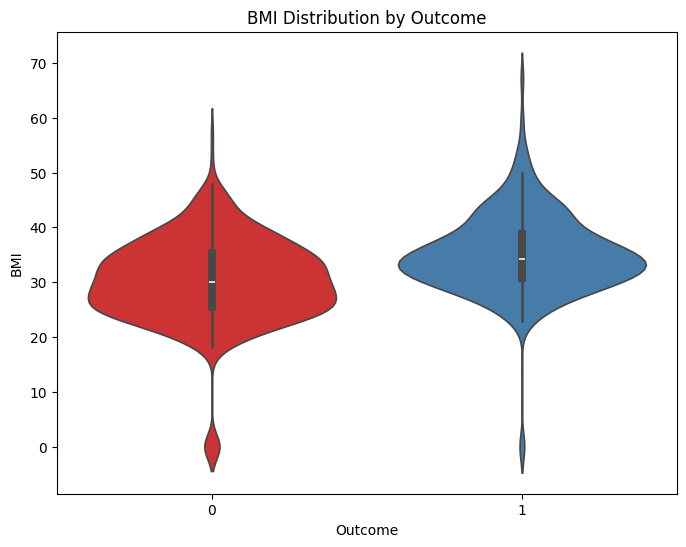

In [194]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Outcome", y="BMI", data=diabetes, palette="Set1")
plt.title("BMI Distribution by Outcome")
plt.xlabel("Outcome")
plt.ylabel("BMI")
plt.show()

- #### Glucose vs BMI Scatter:

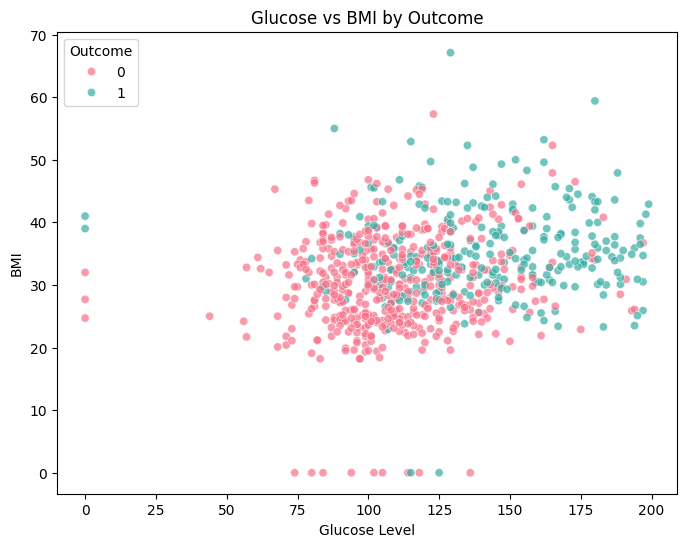

In [195]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=diabetes, x="Glucose", y="BMI", hue="Outcome", palette="husl", alpha=0.7)
plt.title("Glucose vs BMI by Outcome")
plt.xlabel("Glucose Level")
plt.ylabel("BMI")
plt.legend(title="Outcome", loc="upper left")
plt.show()


- #### Age vs Outcome:

C:\Users\DELL\AppData\Local\Temp\ipykernel_4092\1902222061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Age", data=diabetes, palette="viridis")


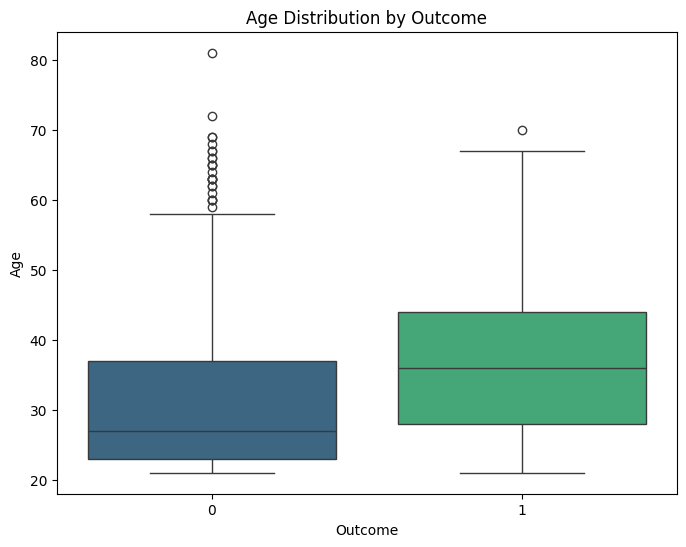

In [196]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Outcome", y="Age", data=diabetes, palette="viridis")
plt.title("Age Distribution by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()


- #### Correlation with Outcome:

C:\Users\DELL\AppData\Local\Temp\ipykernel_4092\943949197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_outcome.values, y=corr_with_outcome.index, palette="viridis")


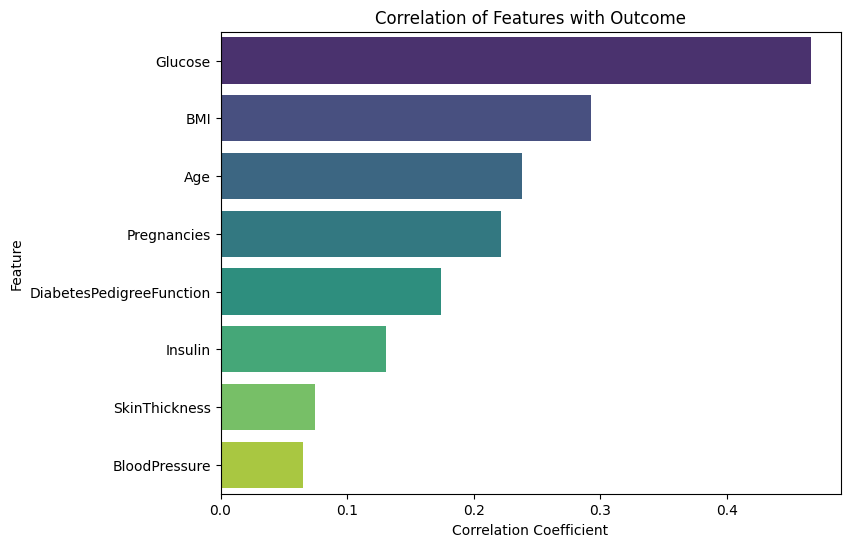

In [197]:
plt.figure(figsize=(8,6))
corr_with_outcome = corr['Outcome'].drop("Outcome").sort_values(ascending=False)
sns.barplot(x=corr_with_outcome.values, y=corr_with_outcome.index, palette="viridis")
plt.title("Correlation of Features with Outcome")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()


- #### Pairplot of Key Features:

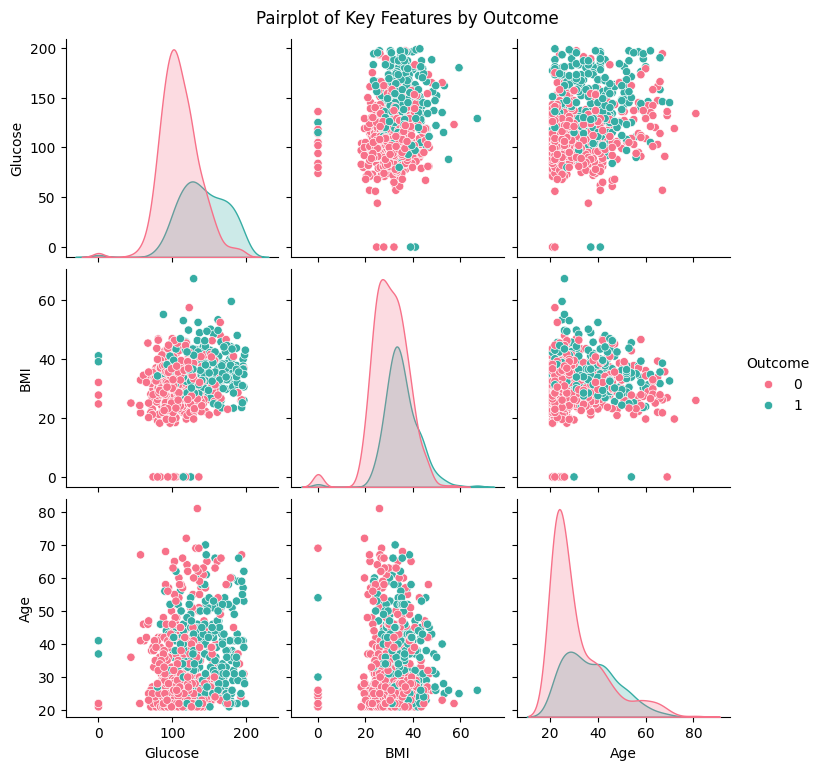

In [198]:
important_features = ["Glucose", "BMI", "Age", "Outcome"]
sns.pairplot(diabetes[important_features], hue="Outcome", palette="husl")
plt.suptitle("Pairplot of Key Features by Outcome", y=1.02)
plt.show()


- #### Diabetes Rate by Age Group

C:\Users\DELL\AppData\Local\Temp\ipykernel_4092\3188079895.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_outcome = diabetes.groupby('AgeGroup')['Outcome'].mean().reset_index()
C:\Users\DELL\AppData\Local\Temp\ipykernel_4092\3188079895.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Outcome', data=age_outcome, palette='Set2')


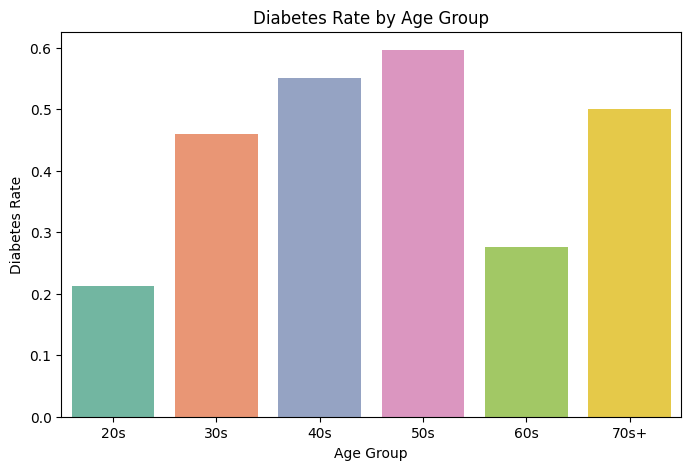

In [199]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20s','30s','40s','50s','60s','70s+']
diabetes['AgeGroup'] = pd.cut(diabetes['Age'], bins=bins, labels=labels, right=False)

age_outcome = diabetes.groupby('AgeGroup')['Outcome'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='AgeGroup', y='Outcome', data=age_outcome, palette='Set2')
plt.title("Diabetes Rate by Age Group")
plt.ylabel("Diabetes Rate")
plt.xlabel("Age Group")
plt.show()


- #### Diabetes Rate by Glucose Group

C:\Users\DELL\AppData\Local\Temp\ipykernel_4092\257693531.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucose_outcome = diabetes.groupby('Glucose_Group')['Outcome'].mean().reset_index()
C:\Users\DELL\AppData\Local\Temp\ipykernel_4092\257693531.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Glucose_Group', y='Outcome', data=glucose_outcome, palette='Set1')


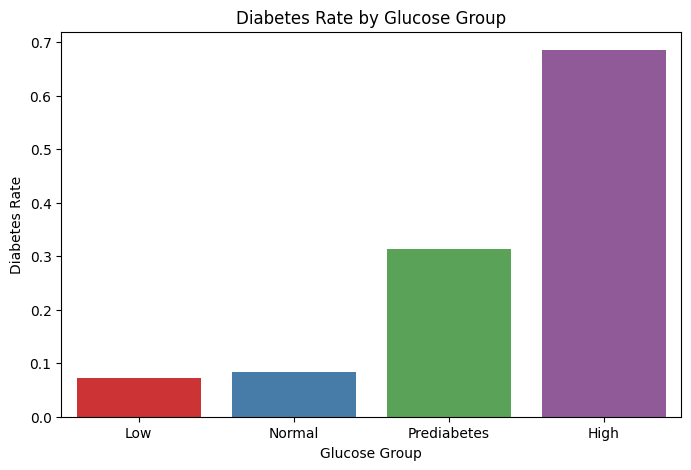

In [200]:
bins = [0, 80, 100, 140, 200]
labels = ['Low','Normal','Prediabetes','High']
diabetes['Glucose_Group'] = pd.cut(diabetes['Glucose'], bins=bins, labels=labels, right=False)

# Group by Glucose
glucose_outcome = diabetes.groupby('Glucose_Group')['Outcome'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Glucose_Group', y='Outcome', data=glucose_outcome, palette='Set1')
plt.title("Diabetes Rate by Glucose Group")
plt.ylabel("Diabetes Rate")
plt.xlabel("Glucose Group")
plt.show()


- #### Diabetes Rate by Age Group and Glucose Level

C:\Users\DELL\AppData\Local\Temp\ipykernel_4092\1818514146.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_glucose = diabetes.groupby(['AgeGroup','Glucose_Group'])['Outcome'].mean().reset_index()


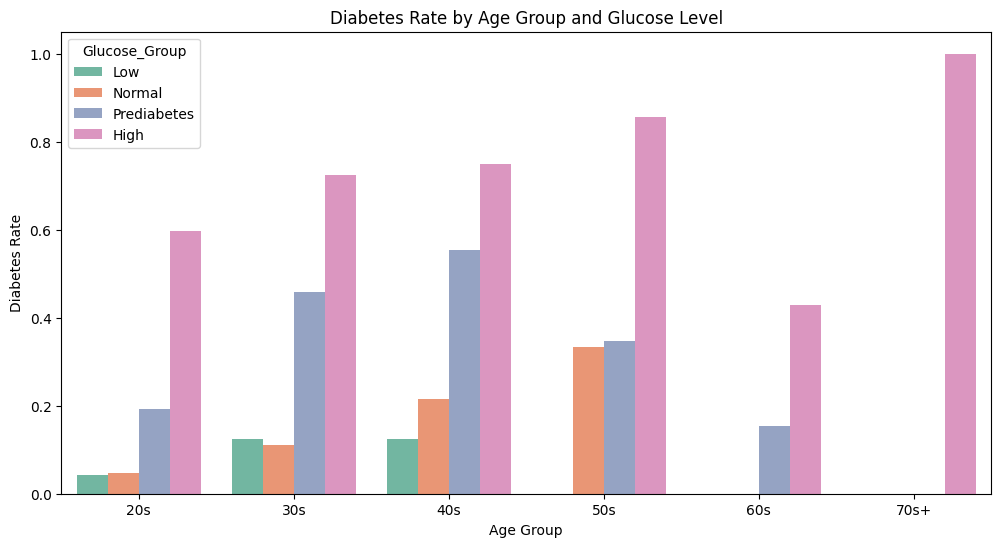

In [201]:
# Group outcome
age_glucose = diabetes.groupby(['AgeGroup','Glucose_Group'])['Outcome'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='AgeGroup', y='Outcome', hue='Glucose_Group', data=age_glucose, palette='Set2')
plt.title("Diabetes Rate by Age Group and Glucose Level")
plt.ylabel("Diabetes Rate")
plt.xlabel("Age Group")
plt.show()


### **Observations**: 
- Diabetics generally have higher glucose levels.

- Higher BMI tends to correlate with diabetes.

- Older patients show higher diabetes prevalence.

- Older age + higher glucose increases diabetes risk.

## Phase 2: Data Preprocessing & Feature Engineering

I enhance the dataset with interaction features to improve predictive power

In [202]:
diabetes.drop(columns=['AgeGroup','Glucose_Group'], inplace=True)

### Feature Engineering

In [203]:
diabetes['Glucose_BMI'] = diabetes['Glucose'] * diabetes['BMI']
diabetes['Glucose_squared'] = diabetes['Glucose'] ** 2
diabetes['BMI_squared'] = diabetes['BMI'] ** 2
diabetes['Glucose_Age'] = diabetes['Glucose'] * diabetes['Age']
diabetes["BMI_DPF"] = diabetes["BMI"] * diabetes["DiabetesPedigreeFunction"]

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_BMI,Glucose_squared,BMI_squared,Glucose_Age,BMI_DPF
0,6,148,72,35,0,33.6,0.627,50,1,4972.8,21904,1128.96,7400,21.0672
1,1,85,66,29,0,26.6,0.351,31,0,2261.0,7225,707.56,2635,9.3366
2,8,183,64,0,0,23.3,0.672,32,1,4263.9,33489,542.89,5856,15.6576
3,1,89,66,23,94,28.1,0.167,21,0,2500.9,7921,789.61,1869,4.6927
4,0,137,40,35,168,43.1,2.288,33,1,5904.7,18769,1857.61,4521,98.6128


In [204]:
diabetes.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose_BMI                 0.490262
Glucose_squared             0.483739
Glucose                     0.466581
Glucose_Age                 0.401283
BMI_squared                 0.297109
BMI                         0.292695
BMI_DPF                     0.242564
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

### Train-Test Split & Scaling

Dropping weak features `(SkinThickness, BloodPressure)` to reduce noise.

In [205]:
from sklearn.model_selection import train_test_split
X = diabetes.drop(['Outcome','SkinThickness','BloodPressure'], axis= 1) # dropping weak features
y = diabetes['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [206]:
train_data = X_train.join(y_train)

In [207]:
test_data = X_test.join(y_test)

In [208]:
from sklearn.preprocessing import StandardScaler

X_train = train_data.drop('Outcome', axis=1)
y_train = train_data['Outcome']
X_test = test_data.drop('Outcome', axis=1)
y_test = test_data['Outcome']

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

## Phase 3: Model Training & Hyperparameter Tuning

### Models Used:
- Logistic Regression
- Support Vector Machine (SVM)
- Random Forest
- XGBoost
- Voting Classifier
- Stacking Classifier
- CatBoost

### Model Evaluation
I focus on multiple metrics:
- `Accuracy`: Overall correctness.
- `Precision`: Correct positive predictions / all positive predictions.
- `Recall`: Correct positive predictions / all actual positives.
- **`Important in medical datasets`**: A high recall ensures we detect most diabetic patients, minimizing false negatives. Missing a diabetic case can have serious consequences, so recall is prioritized over raw accuracy.
- `F1-score`: Balance between precision and recall.
- `AUC`: Ability of the model to distinguish between diabetic and non-diabetic cases.

- #### Logistic Regression

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train_s,y_train)
y_pred_lin = log_reg.predict(X_test_s)

print("Model: LogisticRegression")
print("Accuracy:", accuracy_score(y_test, y_pred_lin))
print(classification_report(y_test, y_pred_lin))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lin))


Model: LogisticRegression
Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[80 19]
 [20 35]]


- #### Support Vector Machine (SVM)

In [210]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_s, y_train)
y_pred_svm = svm_model.predict(X_test_s)

print("Model: Support Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Model: Support Vector Machine (SVM)
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.69      0.60      0.64        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

Confusion Matrix:
 [[84 15]
 [22 33]]


In [235]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto'] ,
    'class_weight': [None, 'balanced']
    }
svm = SVC(probability=True, random_state=42)

grid_svm = GridSearchCV(estimator=svm,
                        param_grid=param_grid,
                        cv=5,
                        scoring='recall',  
                        n_jobs=-1
                        )

grid_svm.fit(X_train_s, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("Best CV Score:", grid_svm.best_score_)

y_pred_svm_tuned = grid_svm.predict(X_test_s)

print("Accuracy on Test:", accuracy_score(y_test, y_pred_svm_tuned))
print(classification_report(y_test, y_pred_svm_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_tuned))




Best SVM Params: {'C': 1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
Best CV Score: 0.7935769656699889
Accuracy on Test: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.85      0.68      0.75        99
           1       0.57      0.78      0.66        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.71      0.72       154

Confusion Matrix:
 [[67 32]
 [12 43]]


- #### Random Forest

In [211]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_s, y_train)

y_pred_rf = rf_model.predict(X_test_s)

print("Model: Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Model: Random Forest
Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
 [[78 21]
 [15 40]]


In [ ]:

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'], 
    'class_weight': [None, 'balanced']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=500, solver='liblinear'), 
                       param_grid, cv=5, scoring='accuracy')
grid_lr.fit(X_train_s, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best CV Score:", grid_lr.best_score_)
y_pred_lr_tuned = grid_lr.predict(X_test_s)
print("Accuracy on Test:", accuracy_score(y_test, y_pred_lr_tuned))
print(classification_report(y_test, y_pred_lr_tuned))
print(confusion_matrix(y_test, y_pred_lr_tuned))


Best Logistic Regression Params: {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}
Best CV Score: 0.7638677862188459
Accuracy on Test: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

[[81 18]
 [18 37]]


In [213]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), 
                       param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_s, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)
y_pred_rf_tuned = grid_rf.predict(X_test_s)
print("Accuracy on Test:", accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))
print(confusion_matrix(y_test, y_pred_rf_tuned))


Best RF Params: {'class_weight': None, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
Best CV Score: 0.7655337864854058
Accuracy on Test: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

[[81 18]
 [18 37]]


- #### XGBoost

In [214]:
from xgboost import XGBClassifier
xgb_params = {
    'learning_rate': 0.01,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': len(y_train[y_train==0])/len(y_train[y_train==1])
}
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

xgb_model.fit(X_train_s, y_train)
y_pred_xgb = xgb_model.predict(X_test_s)

print("Model: XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Model: XGBoost
Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        99
           1       0.62      0.76      0.68        55

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.77      0.75      0.75       154

Confusion Matrix:
 [[73 26]
 [13 42]]


- #### Voting Classifier

In [215]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', grid_lr.best_estimator_), 
                ('rf', grid_rf.best_estimator_), 
                ('xgb', xgb_model)],
    voting='soft'  
)

voting_clf.fit(X_train_s, y_train)
y_pred_vote = voting_clf.predict(X_test_s)

print("Model: Voting Classifier (Soft)")
print("Accuracy:", accuracy_score(y_test, y_pred_vote))
print(classification_report(y_test, y_pred_vote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vote))
print("-"*50)



Model: Voting Classifier (Soft)
Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Confusion Matrix:
 [[77 22]
 [16 39]]
--------------------------------------------------


- #### Stacking Classifier

In [237]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[('lr', grid_lr.best_estimator_), 
                ('rf', grid_rf.best_estimator_), 
                ('xgb', xgb_model)],
    final_estimator=LogisticRegression(max_iter=500),
    cv=5
)

stacking_clf.fit(X_train_s, y_train)
y_pred_stack = stacking_clf.predict(X_test_s)

print("Model: Stacking Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("-"*50)

Model: Stacking Classifier
Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154

Confusion Matrix:
 [[84 15]
 [19 36]]
--------------------------------------------------


- #### CatBoost

In [217]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train_s, y_train)
y_pred_cat = cat_model.predict(X_test_s)

print("Model: CatBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))
print("-"*50)

Model: CatBoost
Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
 [[76 23]
 [16 39]]
--------------------------------------------------


### ROC Curve Comparison

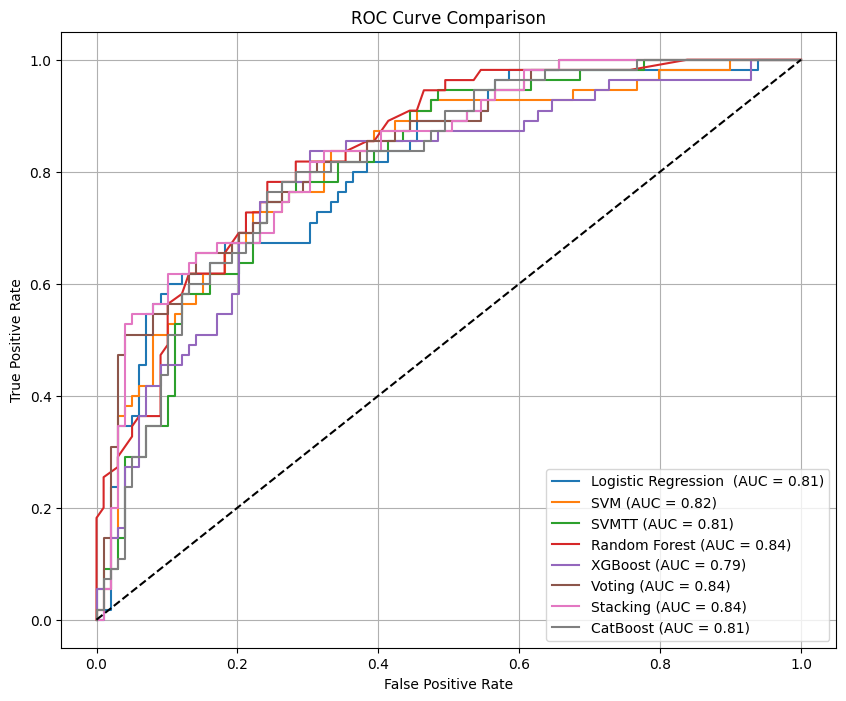

In [238]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

models = {
    "Logistic Regression ":grid_lr ,
    "SVM": svm_model,
    "SVMTT": grid_svm,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Voting": voting_clf,
    "Stacking": stacking_clf,
    "CatBoost" : cat_model
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_s)[:, 1]
    else:
        y_pred_prob = model.decision_function(X_test_s)
        y_pred_prob = (y_pred_prob - y_pred_prob.min()) / (y_pred_prob.max() - y_pred_prob.min())
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [239]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    y_pred = model.predict(X_test_s)
    
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_s)[:, 1]
    else:
        y_pred_prob = model.decision_function(X_test_s)
        y_pred_prob = (y_pred_prob - y_pred_prob.min()) / (y_pred_prob.max() - y_pred_prob.min())
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "AUC": auc
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print(results_df)


                  Model  Accuracy  Precision    Recall  F1-score       AUC
0              Stacking  0.779221   0.705882  0.654545  0.679245  0.835629
1  Logistic Regression   0.766234   0.672727  0.672727  0.672727  0.813590
2         Random Forest  0.766234   0.655738  0.727273  0.689655  0.839118
3                   SVM  0.759740   0.687500  0.600000  0.640777  0.815611
4                Voting  0.753247   0.639344  0.709091  0.672414  0.836731
5               XGBoost  0.746753   0.617647  0.763636  0.682927  0.790266
6              CatBoost  0.746753   0.629032  0.709091  0.666667  0.811938
7                 SVMTT  0.714286   0.573333  0.781818  0.661538  0.810468


C:\Users\DELL\AppData\Local\Temp\ipykernel_4092\114214048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


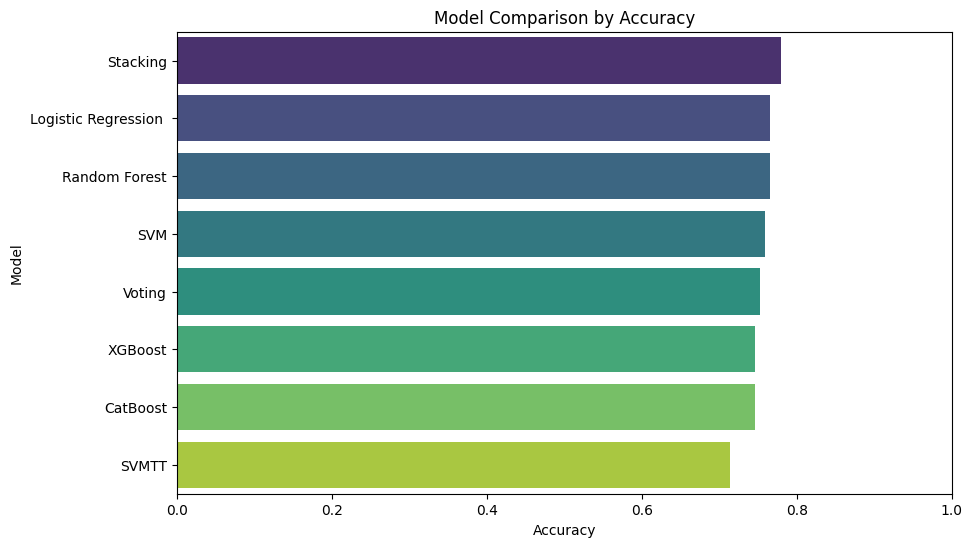

In [240]:
plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison by Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0,1)
plt.show()

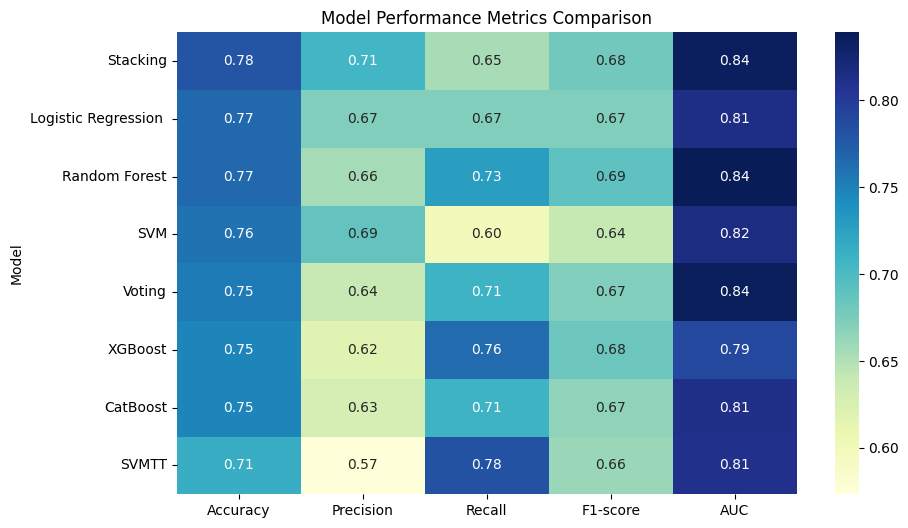

In [241]:
plt.figure(figsize=(10,6))
sns.heatmap(results_df.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Metrics Comparison")
plt.show()

### **Model Evaluation Table**

| Model               | Accuracy | Precision | Recall  | F1-score | AUC   |
| ------------------- | -------- | --------- | ------ | -------- | ----- |
| Stacking            | 0.779    | 0.706     | 0.655  | 0.679    | 0.836 |
| Random Forest       | 0.766    | 0.656     | 0.727  | 0.690    | 0.839 |
| Logistic Regression | 0.766    | 0.673     | 0.673  | 0.673    | 0.814 |
| XGBoost             | 0.747    | 0.618     | 0.764  | 0.683    | 0.790 |
| CatBoost            | 0.747    | 0.629     | 0.709  | 0.667    | 0.812 |
| Voting              | 0.753    | 0.639     | 0.709  | 0.672    | 0.837 |
| **SVM Tuned (SVMTT)** | 0.714    | 0.573     | 0.782  | 0.662    | 0.810 |

### **Observations:** 
- `SVM Tuned (SVMTT)` achieved the highest Recall (0.782), which is excellent for a medical project where minimizing false negatives is critical.  
- `XGBoost` and `Random Forest ` also maintain high Recall despite slightly lower Accuracy, making them valuable in medical contexts.  
- `Stacking` still has the highest Accuracy, but its Recall is lower (0.655).  
- The choice of the final model depends on **balancing Accuracy and Recall** according to the project’s goals.


## Launch The Prediction Engine

This allows predicting new patients’ diabetes risk using engineered features

In [ ]:
def predict_diabetes_final(new_patient, model=xgb_model, scaler=scaler):
    """
    Predicts diabetes for a new patient.

    new_patient: dict containing only the basic features:
    'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
    model: the trained final model to use for prediction
    scaler: the StandardScaler fitted on X_train
    """
    new_patient['Glucose_BMI'] = new_patient['Glucose'] * new_patient['BMI']
    new_patient['Glucose_squared'] = new_patient['Glucose'] ** 2
    new_patient['BMI_squared'] = new_patient['BMI'] ** 2
    new_patient['Glucose_Age'] = new_patient['Glucose'] * new_patient['Age']
    new_patient['BMI_DPF'] = new_patient['BMI'] * new_patient['DiabetesPedigreeFunction']
    
    df_patient = pd.DataFrame([new_patient], columns=X_train.columns)
    
    data_scaled = scaler.transform(df_patient)
    pred = model.predict(data_scaled)[0]
    
    if hasattr(model, "predict_proba"):
        pred_proba = model.predict_proba(data_scaled)[0][1] * 100
        return f"Prediction: {'Diabetic' if pred==1 else 'Non-Diabetic'} (Probability: {pred_proba:.1f}%)"
    else:
        return f"Prediction: {'Diabetic' if pred==1 else 'Non-Diabetic'}"

In [223]:
import pandas as pd
import numpy as np
np.random.seed(42)
data = {
    'Pregnancies': np.random.randint(0, 10, 10),
    'Glucose': np.random.randint(70, 200, 10),
    'Insulin': np.random.randint(15, 276, 10),
    'BMI': np.round(np.random.uniform(18, 45, 10), 1),
    'DiabetesPedigreeFunction': np.round(np.random.uniform(0.1, 2.5, 10), 2),
    'Age': np.random.randint(20, 70, 10)
}

patients_df = pd.DataFrame(data)
patients_df


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,169,267,44.5,0.65,61
1,3,173,250,30.6,0.68,23
2,7,122,63,41.2,1.74,48
3,4,71,73,36.4,1.56,37
4,6,157,184,30.2,2.10,45
5,9,107,202,18.4,0.52,63
6,2,199,204,43.4,1.04,53
7,6,90,189,33.2,0.54,29
8,7,127,65,28.4,1.91,55
9,4,91,69,18.4,1.12,33


In [224]:
patients_df['Prediction'] = patients_df.apply(lambda row: predict_diabetes_final(row.to_dict()), axis=1)
patients_df


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Prediction
0,6,169,267,44.5,0.65,61,Prediction: Diabetic (Probability: 92.0%)
1,3,173,250,30.6,0.68,23,Prediction: Diabetic (Probability: 87.0%)
2,7,122,63,41.2,1.74,48,Prediction: Diabetic (Probability: 56.0%)
3,4,71,73,36.4,1.56,37,Prediction: Non-Diabetic (Probability: 20.0%)
4,6,157,184,30.2,2.10,45,Prediction: Diabetic (Probability: 51.0%)
5,9,107,202,18.4,0.52,63,Prediction: Non-Diabetic (Probability: 13.0%)
6,2,199,204,43.4,1.04,53,Prediction: Diabetic (Probability: 90.0%)
7,6,90,189,33.2,0.54,29,Prediction: Non-Diabetic (Probability: 14.0%)
8,7,127,65,28.4,1.91,55,Prediction: Diabetic (Probability: 52.0%)
9,4,91,69,18.4,1.12,33,Prediction: Non-Diabetic (Probability: 10.0%)
